In [10]:
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import *
import numpy as np
import math

# Import models
from implementation import TwoLayerNet, retain_subset, get_kfold_results

In [16]:
"""
Use the same image data as part 1c but we only choose 3 classes: 0 - tshirt, 4 - coat, 6 - shirt
Image data vectorized
"""

train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Choose 3 classes out of 10
train_data = retain_subset(train_data)
test_data = retain_subset(test_data)

# Label encode the string map into [0,1,2]
le = LabelEncoder()
le.fit(train_data.label.values)
train_data['label'] = le.transform(train_data.label)
test_data['label'] = le.transform(test_data.label)

# Convert to matrices
X_train = train_data.iloc[:,1:].values
y_train = train_data.label.values
X_test = test_data.iloc[:,1:].values
y_test = test_data.label.values

# Normalize pixels
X_train_normalized = X_train/255
X_test_normalized = X_test/255

# One hot encode labels
ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1,1))
y_train_ohe, y_test_ohe = ohe.transform(y_train.reshape(-1,1)), ohe.transform(y_test.reshape(-1,1))

# Assert that we took subsets of 3 classes
assert y_train_ohe.shape[1] == 3 and y_test_ohe.shape[1] == 3

/Users/tuantran/Desktop/cs584-m20-tuan-tran/AS3/src/implementation.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['label'] = df['label'].apply(lambda x: class_map(x))
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


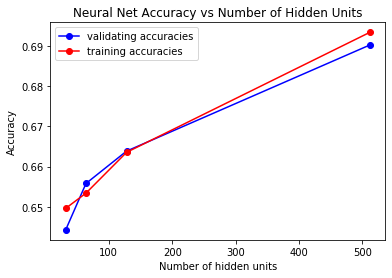

In [7]:
"""
Evaluate neural net performance vs different number of hidden units
"""
num_class = len(np.unique(y_train))
num_units = [32,64,128,512]

average_test_accuracies = []
average_train_accuracies = []
for unit in num_units:
    train_accuracy, test_accuracy = get_kfold_results(X_train_normalized,y_train_ohe,y_train,hidden_units=unit)
    
    # Average accuracy across 5 fold for each setting
    average_test_accuracies.append(np.average(test_accuracy))
    average_train_accuracies.append(np.average(train_accuracy))
    

plt.figure()
plt.plot(num_units, average_test_accuracies,'bo-',label="validating accuracies")
plt.plot(num_units, average_train_accuracies,'ro-',label = "training accuracies")
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy")
plt.title(f'Neural Net Accuracy vs Number of Hidden Units')
plt.legend()

/Users/tuantran/Desktop/cs584-m20-tuan-tran/AS3/src/implementation.py:209: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(y_hat))
/Users/tuantran/Desktop/cs584-m20-tuan-tran/AS3/src/implementation.py:209: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y*np.log(y_hat))
/Users/tuantran/Desktop/cs584-m20-tuan-tran/AS3/src/implementation.py:195: RuntimeWarning: invalid value encountered in true_divide
  res = np.exp(x).T/np.sum(np.exp(x),axis=1)


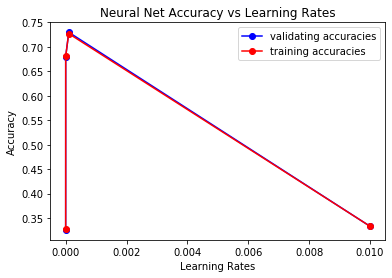

In [4]:
"""
Evaluate neural net performance vs different learning rate
"""

#learning_rates = [1e-2, 1e-4, 1e-6, 1e-8]
learning_rates = [1e-8,1e-6,1e-4,1e-2]
average_test_accuracies = []
average_train_accuracies = []
for learning_rate in learning_rates:
    train_accuracy, test_accuracy = get_kfold_results(X_train_normalized,y_train_ohe,y_train,learning_rate=learning_rate)
    # Average accuracy across 5 fold for each setting
    average_test_accuracies.append(np.average(test_accuracy))
    average_train_accuracies.append(np.average(train_accuracy))
    

plt.figure()
plt.plot(learning_rates, average_test_accuracies,'bo-',label="validating accuracies")
plt.plot(learning_rates, average_train_accuracies,'ro-',label = "training accuracies")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.title(f'Neural Net Accuracy vs Learning Rates')
plt.legend()

In [5]:
"""
Train and test final model
"""

num_class = len(np.unique(y_train))
nn = TwoLayerNet(num_class,hidden_units=128)
nn.fit(X_train_normalized,y_train_ohe.toarray(),epochs=100,learning_rate=1e-4,verbose=0)
print(f"Accuracy score on final test set: {accuracy_score(y_test,nn.predict(X_test_normalized))*100}")

Accuracy score on final test set: 70.39999999999999


In [6]:
"""
Compare my implementation vs sklearn
"""
num_class = len(np.unique(y_train))
nn = MLPClassifier(hidden_layer_sizes=(128,),activation='logistic',solver='sgd',momentum=0)
nn_custom = TwoLayerNet(num_class,hidden_units=128)

print('Training...')
nn.fit(X_train_normalized,y_train_ohe.toarray())
nn_custom.fit(X_train_normalized,y_train_ohe.toarray(),epochs=100,learning_rate=1e-4,verbose=0)

print(f"Sklearn model accuracy score on final test set: {accuracy_score(y_test,np.argmax(nn.predict(X_test_normalized),axis=1))*100}")
print(f"My model accuracy score on final test set: {accuracy_score(y_test,nn_custom.predict(X_test_normalized))*100}")

Training...


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Sklearn model accuracy score on final test set: 64.53333333333333
My model accuracy score on final test set: 73.3
